In [1]:
import os; os.environ['CUDA_VISIBLE_DEVICES'] = "2"

In [2]:
import tensorflow; import keras

Using TensorFlow backend.


In [3]:
tensorflow.__version__

'1.2.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [5]:
TRAIN_PATH = "/afs/csail.mit.edu/u/j/jains/6869-places/data/images/train/"

train_prefixes = os.listdir(TRAIN_PATH)
len(train_prefixes), train_prefixes

(101,
 ['fire_station',
  'kitchen',
  'abbey',
  'racecourse',
  'valley',
  'track-outdoor',
  'harbor',
  'office',
  'iceberg',
  'palace',
  'yard',
  'laundromat',
  'campsite',
  'shed',
  'gas_station',
  'market-outdoor',
  'badlands',
  'lighthouse',
  'dam',
  'desert-sand',
  'dining_room',
  'driveway',
  'airport_terminal',
  'amphitheater',
  'amusement_park',
  'aquarium',
  'aqueduct',
  'art_gallery',
  'assembly_line',
  'auditorium',
  'bakery-shop',
  'ballroom',
  'bamboo_forest',
  'banquet_hall',
  'bar',
  'baseball_field',
  'bathroom',
  'beauty_salon',
  'bedroom',
  'boat_deck',
  'bookstore',
  'botanical_garden',
  'bowling_alley',
  'boxing_ring',
  'bridge',
  'bus_interior',
  'butchers_shop',
  'candy_store',
  'canyon',
  'cemetery',
  'chalet',
  'church-outdoor',
  'classroom',
  'clothing_store',
  'coast',
  'cockpit',
  'coffee_shop',
  'conference_room',
  'construction_site',
  'corn_field',
  'corridor',
  'courtyard',
  'food_court',
  'foun

In [9]:
def show(path, subpath, img_name):
    img_path = path + subpath + img_name
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(subpath)

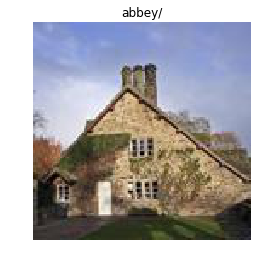

In [10]:
subpath = 'abbey/'
fname = '00000011.jpg'
show(TRAIN_PATH, subpath, fname)

# Make Model

In [24]:
import h5py
from DeepLearningModels import resnet50
model = resnet50.ResNet50(weights=None, classes=101)

print(model.summary())

# compile the model with crossentropy loss function.
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D) (None, 230, 230, 3)   0           input_3[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_3[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

# Train the model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size=16, classes=train_prefixes, target_size=(224,224))

Found 100000 images belonging to 101 classes.


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
        epochs=10)#,
#         validation_data=validation_generator,
#         validation_steps=800)

Epoch 1/10
 922/6250 [===>..........................] - ETA: 1947s - loss: 5.1227 - acc: 0.0216

In [ ]:
model.save('my_model-resnet-train.h5')

# Evaluate on Test Set

In [ ]:
result = model.evaluate(all_vals, labels, batch_size=128)
print("Loss on valid set:"  + str(result[0]) + " Accuracy on valid set: " + str(result[1]))